In [1]:
import numpy as np 
import pandas as pd

In [16]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [18]:
df=pd.read_csv('\\Users\\DIVYA\Documents\\pramee\\Advertising.csv')


In [19]:
df.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [20]:
df.tail(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [21]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [22]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [23]:
df.isnull()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [33]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [24]:
df[df.duplicated()]

,Unnamed: 0,TV,Radio,Newspaper,Sales


In [25]:
df.shape

(200, 5)

In [26]:
#scatter PLot

<Axes: xlabel='Radio', ylabel='Sales'>

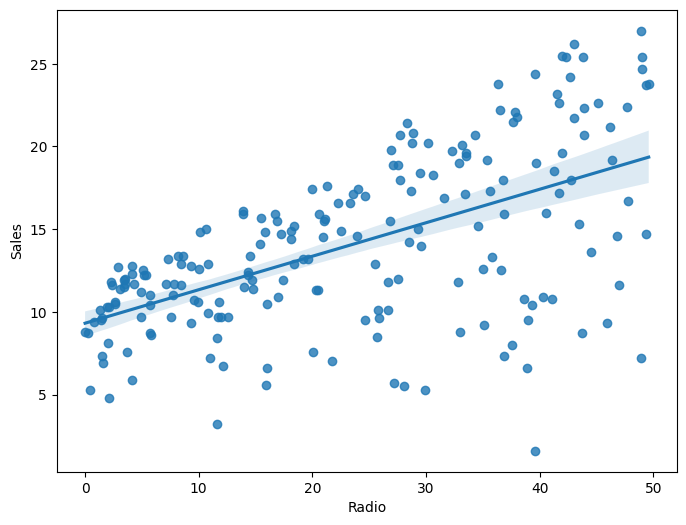

In [28]:
plt.figure(figsize=(8,6))
sns.regplot(x='Radio',y='Sales',data=df)

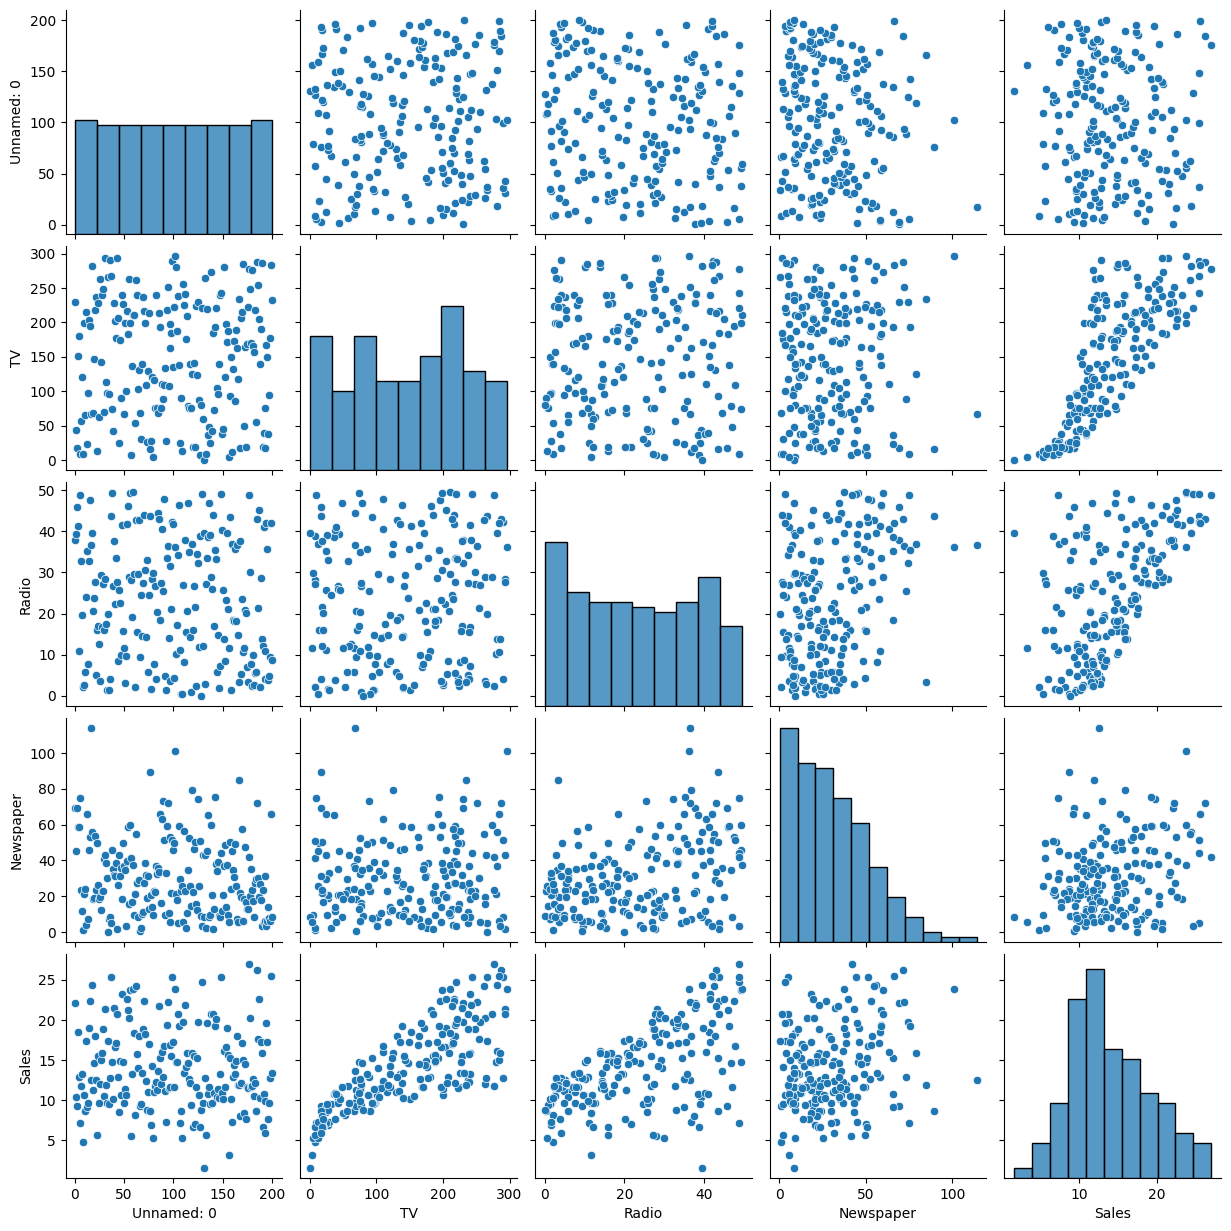

In [30]:
sns.pairplot(df)


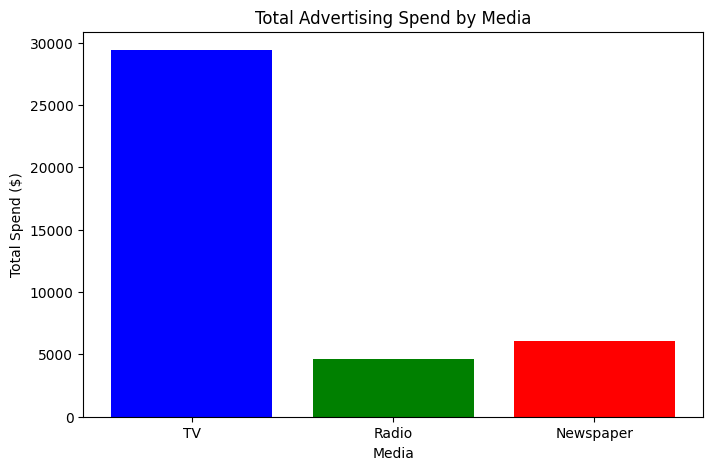

In [31]:
# Calculate total spend by media
ad_spends = df[['TV', 'Radio', 'Newspaper']].sum().reset_index()
ad_spends.columns = ['Media', 'Total Spend']

# Plot using Matplotlib
plt.figure(figsize=(8, 5))
plt.bar(ad_spends['Media'], ad_spends['Total Spend'], color=['blue', 'green', 'red'])
plt.title('Total Advertising Spend by Media')
plt.xlabel('Media')
plt.ylabel('Total Spend ($)')
plt.show()

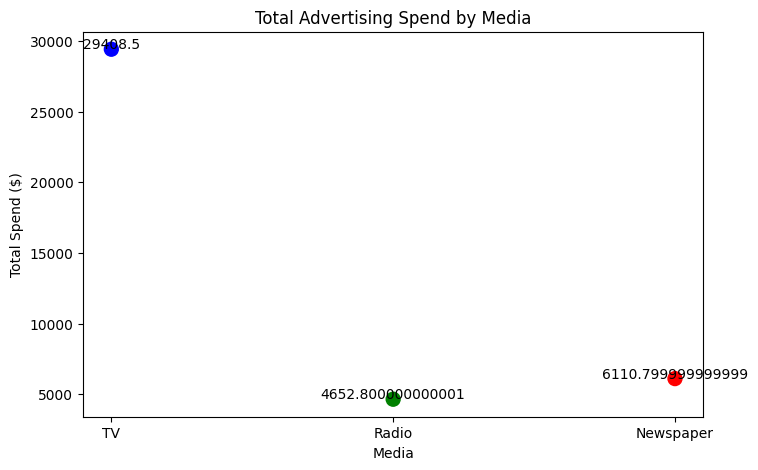

In [56]:
# Scatter plot
plt.figure(figsize=(8, 5))
colors = {'TV': 'blue', 'Radio': 'green', 'Newspaper': 'red'}
plt.scatter(ad_spends['Media'], ad_spends['Total Spend'], color=[colors[media] for media in ad_spends['Media']], s=100)

# Adding text labels for each point
for i, row in ad_spends.iterrows():
    plt.text(row['Media'], row['Total Spend'] + 50, f"{row['Total Spend']}", ha='center')

plt.title('Total Advertising Spend by Media')
plt.xlabel('Media')
plt.ylabel('Total Spend ($)')
plt.show()

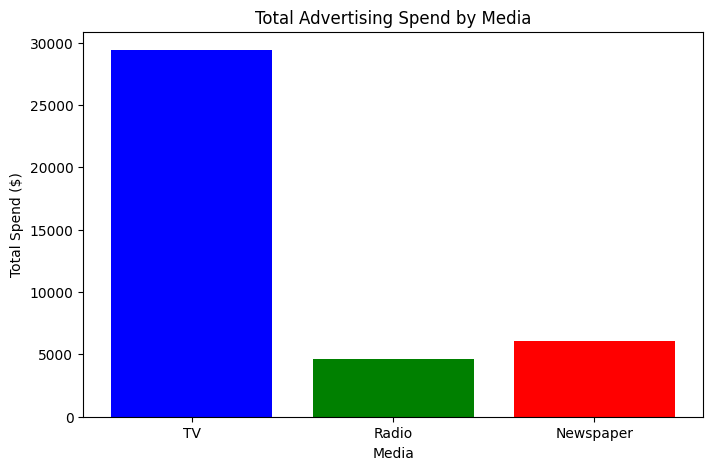

In [57]:
plt.figure(figsize=(8, 5))
plt.bar(ad_spends['Media'], ad_spends['Total Spend'], color=['blue', 'green', 'red'])
plt.title('Total Advertising Spend by Media')
plt.xlabel('Media')
plt.ylabel('Total Spend ($)')
plt.show()

<Axes: xlabel='Sales', ylabel='Count'>

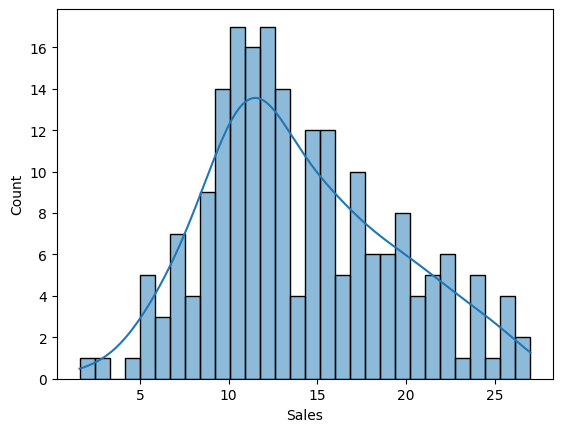

In [32]:
sns.histplot(df['Sales'],bins=30, kde=True)

<Axes: >

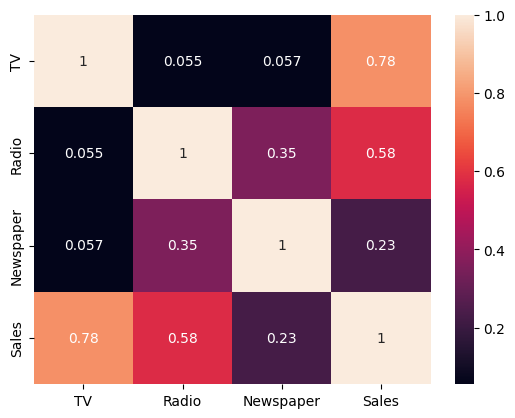

In [33]:
cor_mat = df[["TV", "Radio", "Newspaper", "Sales"]].corr()
sns.heatmap(cor_mat, annot=True)

<Axes: >

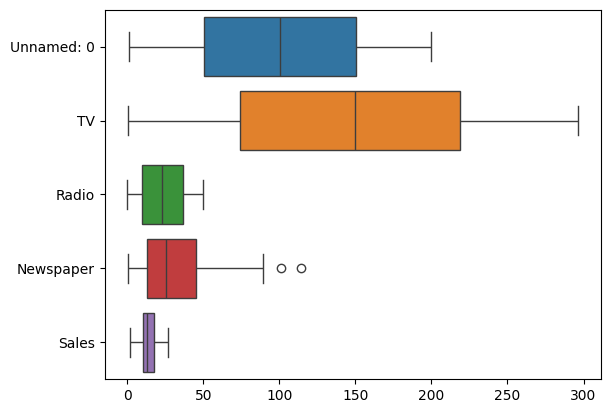

In [34]:
sns.boxplot(data=df,orient='h')

In [46]:
#Removing outliers

<Axes: xlabel='Newspaper'>

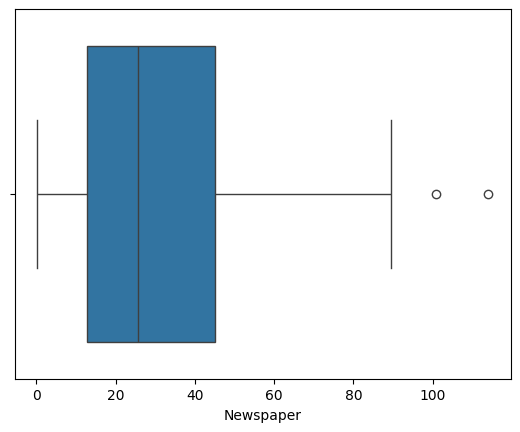

In [35]:
sns.boxplot(data=df['Newspaper'],orient='h')

In [36]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1

In [37]:
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

In [38]:
df1 = df[(df >= lower_bound) & (df <= upper_bound) | df.isnull()]


In [39]:
df1.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [49]:
df1.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     2
Sales         0
dtype: int64

In [40]:
df1['Newspaper'] = df1['Newspaper'].fillna(df1['Newspaper'].mean())

In [41]:
df1.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [42]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200.0,100.500000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.042500,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.264000,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,29.777273,20.343298,0.3,12.750,25.75,43.550,89.4
Sales,200.0,14.022500,5.217457,1.6,10.375,12.90,17.400,27.0


<Axes: >

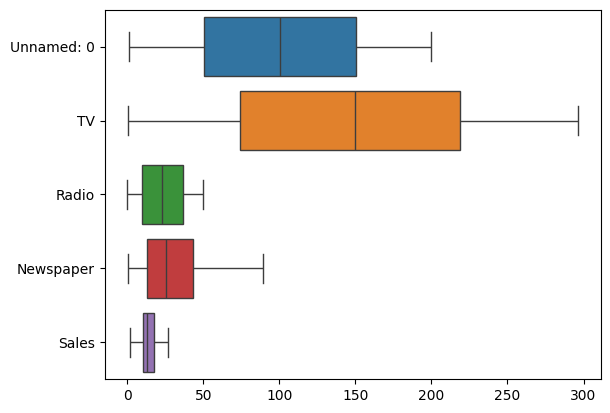

In [43]:
sns.boxplot(data=df1,orient='h')

In [49]:
from sklearn.model_selection import train_test_split

X = df1.drop('Sales', axis=1)
Y = df1[["Sales"]]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=46)

In [59]:
#linear ragerssion model

In [50]:
import statsmodels.api as sm
linear_model = sm.OLS.from_formula(formula="Sales ~ TV + Radio + Newspaper", data=df1).fit()

In [51]:
print(linear_model.params, "\n")

Intercept    2.942325
TV           0.045763
Radio        0.188556
Newspaper   -0.001194
dtype: float64 



In [52]:
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           1.57e-96
Time:                        22:50:57   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9423      0.315      9.326      0.0

In [60]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [64]:
from sklearn.metrics import mean_squared_error, r2_score
Y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 2.9206763832728773
R^2 Score: 0.8493968337075539


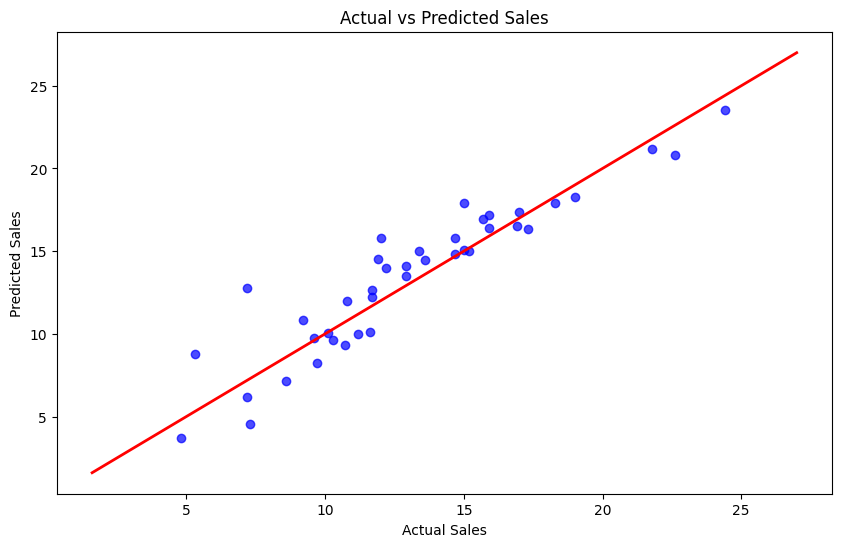

In [67]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, alpha=0.7, color='blue')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red', lw=2)  # line of perfect prediction
plt.show()